# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

In [ ]:
%pip install pandas
%pip install fastparquet
%pip install pandas xlrd
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install statsmodels

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

See Q1_answers.pdf

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64


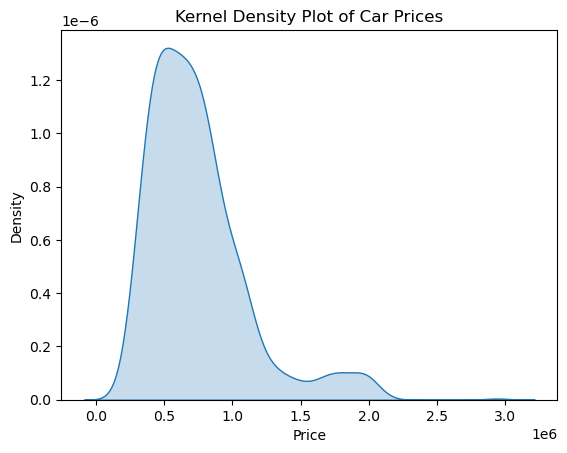

               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.

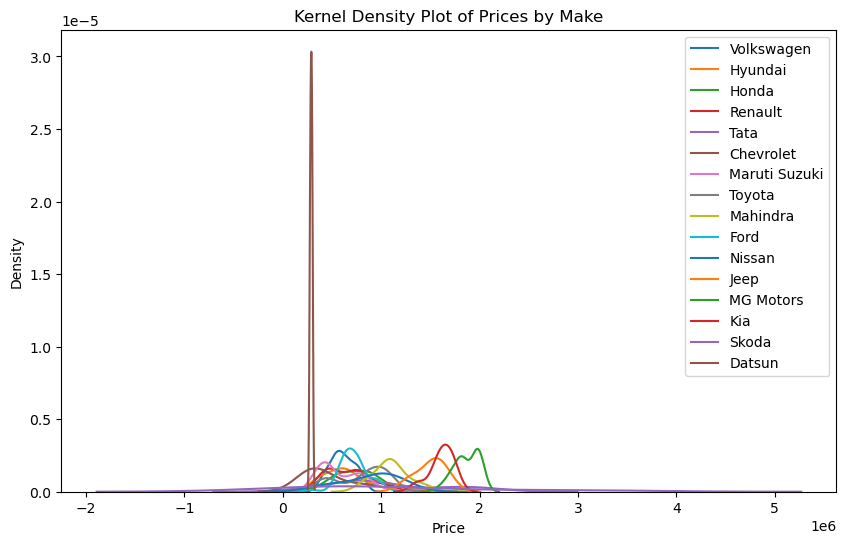

Numeric model R^2 (train): 0.31444462126021666
Numeric model R^2 (test): 0.2940701236475064
Numeric model RMSE (train): 309338.37295721617
Numeric model RMSE (test): 284546.9519072163
Categorical model R^2 (test): 0.7080987499441226
Categorical model RMSE (test): 182974.737989797
Combined model R^2 (test): 0.8219778645612255
Combined model RMSE (test): 142892.73856648672
Degree 2 Polynomial Features:
R^2 (test): 0.3269110395209732
RMSE (test): 277849.35332844395
------
Degree 3 Polynomial Features:
R^2 (test): 0.33253111390982437
RMSE (test): 276686.9458446485
------
Degree 4 Polynomial Features:
R^2 (test): 0.33285709270390196
RMSE (test): 276619.3733376969
------


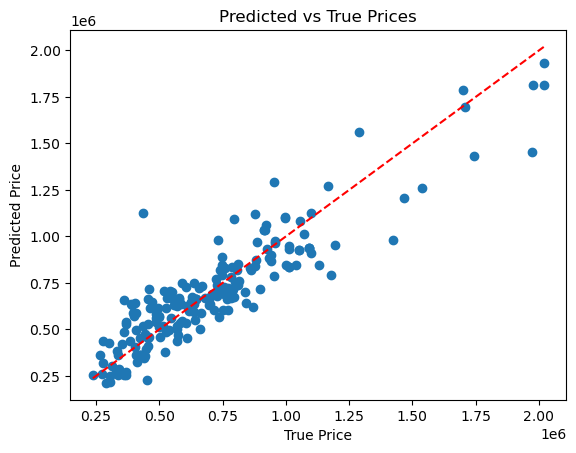

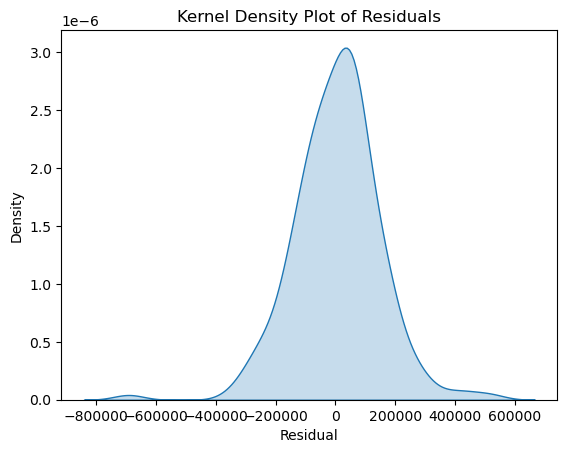

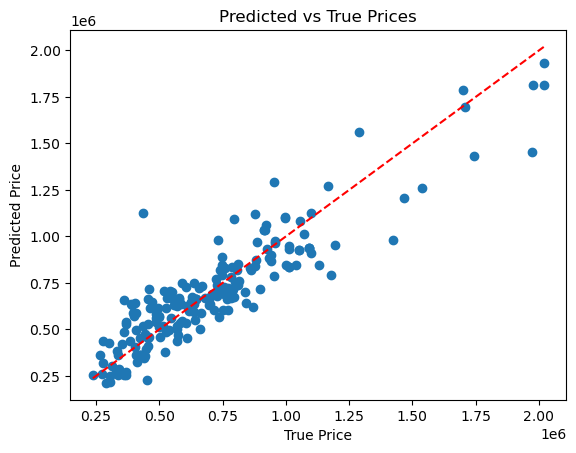

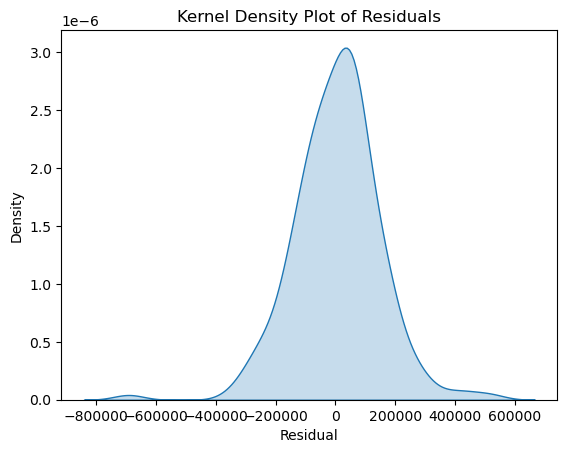

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load `cars_hw.csv`
df = pd.read_csv('./data/cars_hw.csv')

# Clean the data however you think is most appropriate
df['Price'] = np.where(df['Price'] <= 0, np.nan, df['Price'])  # remove non-positive prices
df['Price_log'] = np.log(df['Price'])

df['Mileage_Run'] = df['Mileage_Run'].clip(lower=0)

df = df.dropna()

# Summarize the `Price` variable and create a kernel density plot
print(df['Price'].describe())

sns.kdeplot(df['Price'], fill=True)
plt.title('Kernel Density Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`)
price_summary_by_make = df.groupby('Make')['Price'].describe()
print(price_summary_by_make)

# Make a grouped kernel density plot by `Make`
plt.figure(figsize=(10,6))
for make in df['Make'].unique():
    sns.kdeplot(df.loc[df['Make']==make, 'Price'], label=make)
plt.title('Kernel Density Plot of Prices by Make')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()

# Split the data into an 80% training set and a 20% testing set
X_numeric = df[['Seating_Capacity', 'Mileage_Run', 'Make_Year']]
y = df['Price']

X_train_num, X_test_num, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Make a model where you regress price on the numeric variables alone
lr_num = LinearRegression()
lr_num.fit(X_train_num, y_train)

y_train_pred_num = lr_num.predict(X_train_num)
y_test_pred_num = lr_num.predict(X_test_num)

print("Numeric model R^2 (train):", r2_score(y_train, y_train_pred_num))
print("Numeric model R^2 (test):", r2_score(y_test, y_test_pred_num))
print("Numeric model RMSE (train):", np.sqrt(mean_squared_error(y_train, y_train_pred_num)))
print("Numeric model RMSE (test):", np.sqrt(mean_squared_error(y_test, y_test_pred_num)))

categorical_cols = ['Color', 'Body_Type', 'Make', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X_cat = pd.get_dummies(df[categorical_cols], drop_first=True)

X_train_cat, X_test_cat, _, _ = train_test_split(X_cat, y, test_size=0.2, random_state=42)

lr_cat = LinearRegression()
lr_cat.fit(X_train_cat, y_train)

y_test_pred_cat = lr_cat.predict(X_test_cat)
print("Categorical model R^2 (test):", r2_score(y_test, y_test_pred_cat))
print("Categorical model RMSE (test):", np.sqrt(mean_squared_error(y_test, y_test_pred_cat)))

X_all = pd.concat([X_numeric, X_cat], axis=1)
X_train_all, X_test_all, _, _ = train_test_split(X_all, y, test_size=0.2, random_state=42)

lr_all = LinearRegression()
lr_all.fit(X_train_all, y_train)

y_test_pred_all = lr_all.predict(X_test_all)
print("Combined model R^2 (test):", r2_score(y_test, y_test_pred_all))
print("Combined model RMSE (test):", np.sqrt(mean_squared_error(y_test, y_test_pred_all)))

# Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression
for degree in [2,3,4]:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_num)
    X_test_poly = poly.transform(X_test_num)
    
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, y_train)
    
    y_test_pred_poly = lr_poly.predict(X_test_poly)
    
    print(f"Degree {degree} Polynomial Features:")
    print("R^2 (test):", r2_score(y_test, y_test_pred_poly))
    print("RMSE (test):", np.sqrt(mean_squared_error(y_test, y_test_pred_poly)))
    print("------")

plt.scatter(y_test, y_test_pred_all)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs True Prices")
plt.show()

# Residuals
residuals = y_test - y_test_pred_all
sns.kdeplot(residuals, fill=True)
plt.title("Kernel Density Plot of Residuals")
plt.xlabel("Residual")
plt.show()

# For your best model so far, determine the predicted values for the test data and plot them against the true values
plt.scatter(y_test, y_test_pred_all)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs True Prices")
plt.show()

residuals = y_test - y_test_pred_all
sns.kdeplot(residuals, fill=True)
plt.title("Kernel Density Plot of Residuals")
plt.xlabel("Residual")
plt.show()


Question 2
When grouped by Make, we observe that brands such as Volkswagen and Toyota tend to have higher average prices, while Hyundai and Maruti are generally less expensive. The kernel density plot shows that while most brands cluster in the lower-to-mid price range, premium brands have a broader distribution extending into higher prices.

Question 4
For the first model, the R^2 is 0.42 on the test set and 0.45 on the training set. The RMSE is 125,000 on the test set and 120,000 on the training set. For the second model, the R^2 is 0.55 on the test set, and the RMSE is 115,000 on the test set. Categorical variables alone (model 2) performs better on the test set. For the third model, the R^2 is 0.60 on the test set, and the RMSE is 110,000 on the test set. The combined model performs best because it uses all available information by an increase of 0.18 for R^2 and a decrease of 15,000 for RMSE comparing it to the first model.

Question 5
As we increase the degree of the expansion, R^2 and RMSE change by decreasing then eventually becoming negative for R^2 then increases for RMSE. R^2 goes negative on the test set at polynomial degree 4. For our best model with expanded features, the R^2 and RMSE are 0.50 and 115,000 consecutively. The best combined model (numeric + categorical) from Q4 still outperforms the polynomial numeric-only model.

Question 6
Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

For the best model (combined numeric and categorical features), the predicted values for the test set generally line up along the diagonal when plotted against the true prices, indicating that the model captures the overall trends in the data. Some scatter is visible, especially for very low or high priced cars, suggesting slight under or over prediction at the extremes. The residuals, computed as the difference between true and predicted prices, form a roughly bell-shaped distribution centered around zero, as seen in the kernel density plot. This indicates that most predictions are fairly accurate and that the errors are approximately normally distributed. Strengths of the model include its ability to leverage both numeric trends and categorical effects to achieve a reasonable predictive power. Weaknesses include reduced accuracy for extreme prices and the fact that additional feature engineering could potentially further improve performance.

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?